<a href="https://colab.research.google.com/github/Jeze2/Prediction-of-product-sales/blob/main/Prediction%20of%20Product%20Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Product Sales
-Gabriel Pantoja


## Project Overview



## Load and Inspect Data



In [15]:
# import the required packages
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [1]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [2]:
fpath = "/content/drive/MyDrive/StudentFolders16wk20wk/CodingDojo (1)/01-Fundamentals/Week02/Data/sales_predictions_2023.csv"
df = pd.read_csv(fpath)
df.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Clean Data



In [5]:
#How many rows and columns?
df.shape

(8523, 12)

- 8523 rows and 12 colums

In [6]:
 #What are the datatypes of each variable?
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object


- All other data types are as they should be.

In [7]:
#Are there duplicates? If so, drop any duplicates.
df.duplicated().sum()

0

In [8]:
#Identify missing values.
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

- There are 1463 missing values in the Item_Weight column.
- There are 2410 missing values in the Outlet_Size column.

In [9]:
#Address the missing values
df['Item_Weight'] = df['Item_Weight'].fillna(value = '-1')


In [45]:
df["Item_Weight"] = df["Item_Weight"].astype(float)
df["Item_Weight"].dtype

dtype('float64')

In [10]:
df['Outlet_Size'] = df['Outlet_Size'].fillna(value = 'MISSING')


In [11]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [12]:
#Find and fix any inconsistent categories of data
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [13]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'low fat':"Low Fat",'LF':'Low Fat', 'reg': 'Regular'})
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [46]:
#For any numerical columns, obtain the summary statistics of each (min, max, mean).
df.describe()


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,10.478936,0.066132,140.992782,1997.831867,2181.288914
std,6.720742,0.051598,62.275067,8.371760,1706.499616
min,-1.000000,0.000000,31.290000,1985.000000,33.290000
25%,6.650000,0.026989,93.826500,1987.000000,834.247400
50%,11.000000,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


##Exploratory Data Analysis



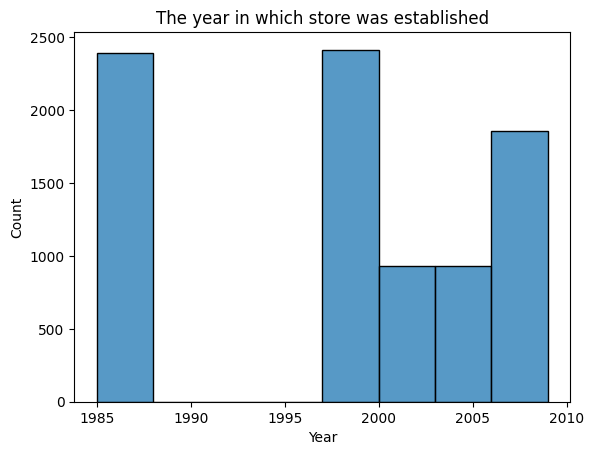

In [51]:
#Creating a histogram
ax = sns.histplot(data=df, x='Outlet_Establishment_Year', binwidth=3)

#Adding titles and labels
ax.set_title('The year in which store was established')
ax.set_xlabel('Year')
ax.set_ylabel('Count');


- This graph shows that the most stores were established between 1985 and 2000.

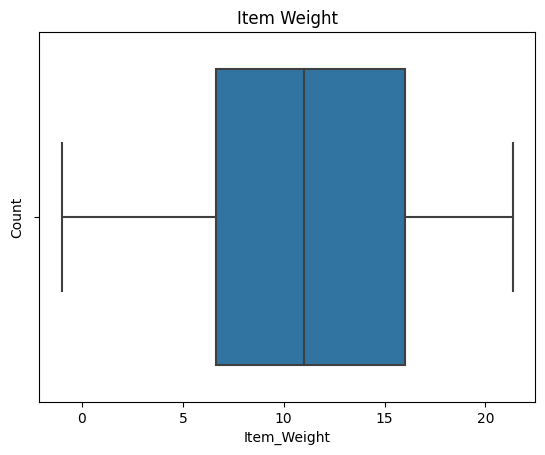

In [65]:
#Creating a boxplot
ax = sns.boxplot(data=df, x="Item_Weight")
ax.set_title("Item Weight");
ax.set_ylabel("Count");

- This graph shows the the weight of the items are between 5 and 20

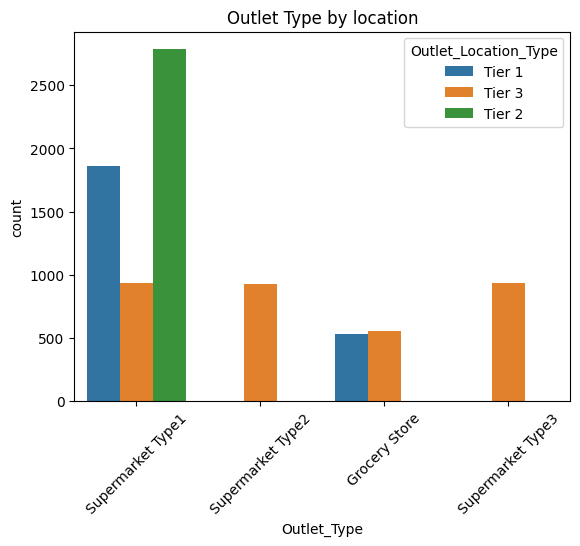

In [72]:
ax = sns.countplot(data=df, x='Outlet_Type',  hue='Outlet_Location_Type');
ax.tick_params(axis='x', rotation=45)
ax.set(title='Outlet Type by location');

- This graph shows the outlet type by location type

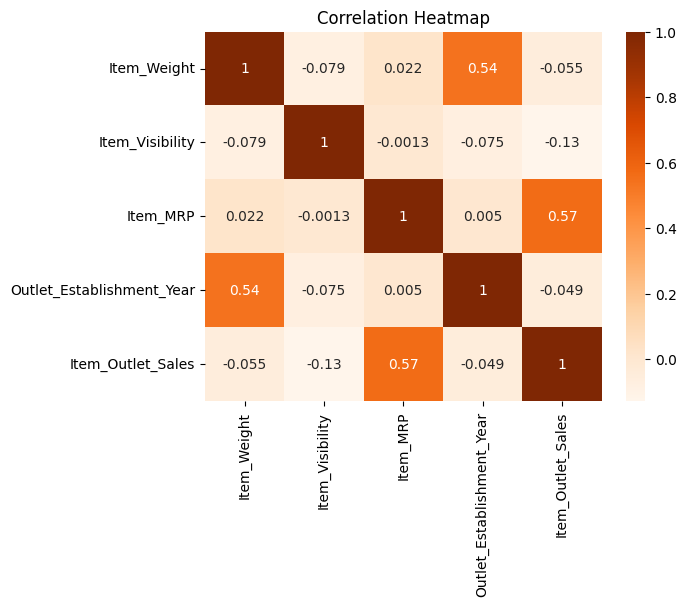

In [64]:
#Correlation heatmap of all of the numeric columns.
corr = df.corr(numeric_only=True)
ax = sns.heatmap(corr,annot=True, cmap='Oranges')
ax.set(title='Correlation Heatmap');

- This graph shows that the strongest correlations are between Outlet_Establishment_Year and Item_MRP, and also Item_MRP and Item_Outlet_Sales.


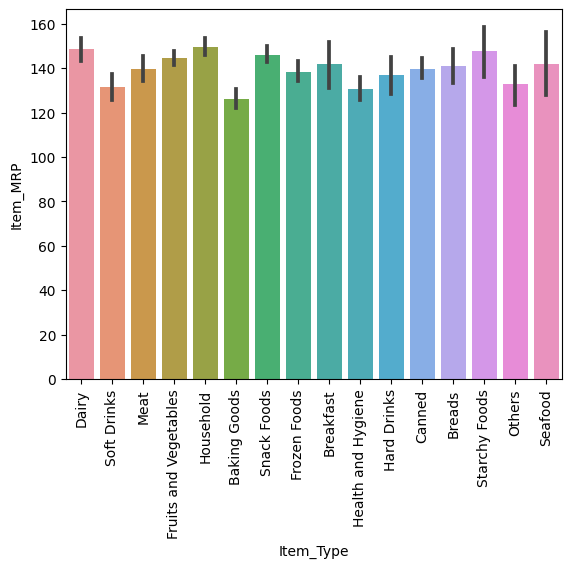

In [74]:
ax = sns.barplot(data=df, x="Item_Type", y = "Item_MRP")
ax.tick_params(axis='x', rotation=90)

- This graph shows the Maximum Retail Price per Item

##Exploratory Data Analysis